### Decline Curve Analisys tool

In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, date
import matplotlib.pyplot as plt
import math
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import pylab
from pylab import rcParams

#pd.set_option('display.notebook_repr_html', False)
#pd.set_option('display.max_columns', 8)
#pd.set_option('display.max_rows', 10)
#pd.set_option('display.width', 90)

data_path = '../data/Prod data.xlsx'
fc_path = '../data/fc.xlsx'
#df = pd.read_excel(data_path, index_col=1)  # в качестве индекса используется столбец скважин
df = pd.read_excel(data_path)  # в качестве индекса используется столбец скважин

### Get last observed rate
for well `well_name` on date `last_hist_date`

In [3]:
well_name = 'well-1'
last_hist_date = '2020-03-01'

# Получение посл-го истор-го дебита = месячная добыча / кол-во часов работы * 24 = среднесуточный дебит
last_hist_rate = df['Oil production (actual), t'][(df['Well'] == well_name) & (df['Date'] == last_hist_date)] \
/ df['Working hours'][(df['Well'] == well_name) & (df['Date'] == last_hist_date)] * 24

# преобразование объекта series в число
#last_hist_rate = last_hist_rate.item()
print(f'last_hist_rate = {last_hist_rate}')

last_hist_rate = Series([], dtype: float64)


### DCA plot (Arps) in log scale. Defining parameters

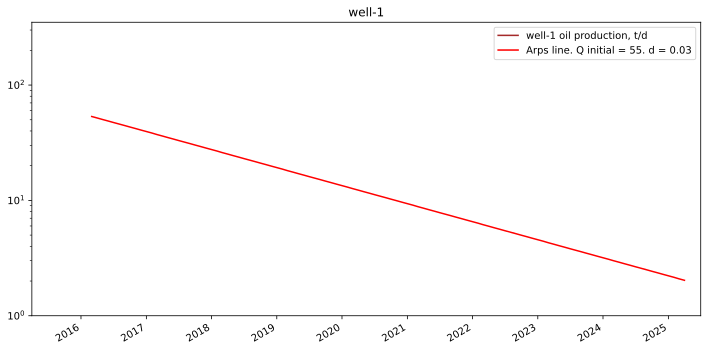

In [4]:
qi =  55 #last_hist_rate  # initial rate = last historical
d = 0.03                  # Arps factor
q_elim = 2                # economical limit
s_date_fc = '2016-03-01'  # forecast start date
# =================================================================================
q_fc = []
month_no = 1  # start count from first month
#q = qi        
while qi * math.exp(-month_no * d) > q_elim:
    q = qi * math.exp(-month_no * d)
    q_fc.append(q)
    month_no += 1
# q_fc # forecast rate array 

dates_fc = pd.date_range(start = s_date_fc, periods=len(q_fc), freq='MS') # array date generating for forecast
q_fc_series = pd.Series(q_fc, index=dates_fc) # объединение прогнозных дебитов и массива дат как индекса в объекте Series
rcParams['figure.figsize'] = 12, 6
data1 = df['Oil production (actual), t'].where(df['Well'] == well_name) / df['Working hours'] * 24
plt.plot(df['Date'], data1, color="brown", label=f'{well_name} oil production, t/d')
# кривая прогноза
q_fc_series.plot(color="red", label=f'Arps line. Q initial = {qi}. d = {d}')
#q_fc2 = q_fc_series + 2
#q_fc2.plot(color="red")
plt.legend()
plt.yscale(value="log")
plt.axis(['2015-04-01', '2025-07-01', 1, 350])  # plt.xlim(2010*365, 2024*365)  # нумерация в днях
plt.title(well_name)
plt.show()

### Визуализация прогнозных данных

In [5]:
pd.DataFrame(q_fc_series.round(1), dates_fc)

,0
2016-03-01,53.4
2016-04-01,51.8
2016-05-01,50.3
2016-06-01,48.8
2016-07-01,47.3
...,...
2024-12-01,2.3
2025-01-01,2.2
2025-02-01,2.2
2025-03-01,2.1


### Отрисовка исторических данных с прогнозом

No handles with labels found to put in legend.


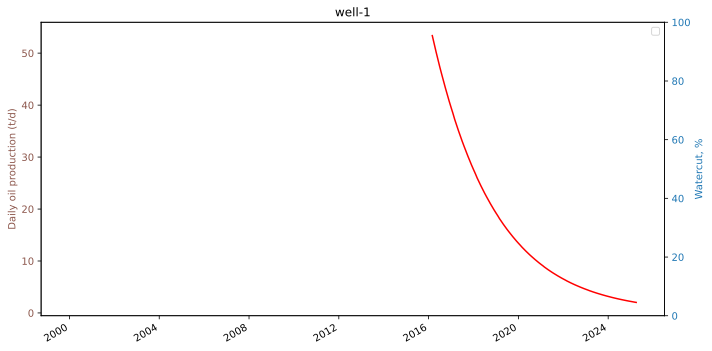

In [6]:
#t = df['Date']  # well_name = 'Plat-2'
data1 = df['Oil production (actual), t'].where(df['Well'] == well_name) / df['Working hours'] * 24
data2 = df['WCT, %'].where(df['Well'] == well_name)
data3 = df['Gas production, M m3'].where(df['Well'] == well_name) / df['Working hours'] * 24

fig, ax1 = plt.subplots(figsize = (10, 5))

color = 'tab:brown'
#ax1.set_xlabel('Date')
ax1.set_ylabel('Daily oil production (t/d)', color=color)
ax1.plot(df['Date'], data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# кривая прогноза
q_fc_series.plot(color="red")

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Watercut, %', color=color)  # we already handled the x-label with ax1
ax2.plot(df['Date'], data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0,100)                          # limits for WCT


legend = plt.legend(loc='upper right')
plt.setp(legend.get_texts(), color="black")
#ax1.legend()
#ax2.legend()
plt.title(well_name)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.legend()
plt.show()

### Визуализация данных stacked plot 

(735475, 738760)

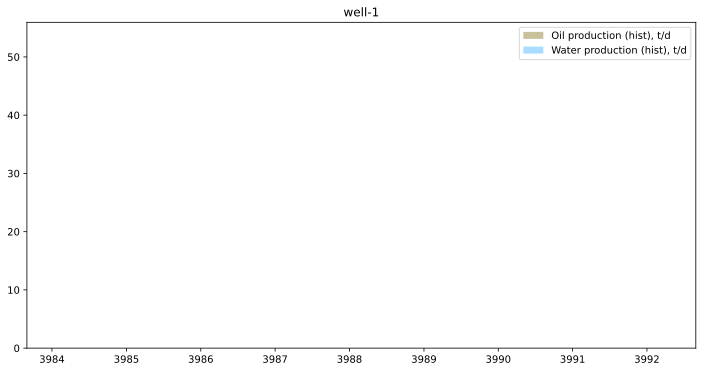

In [7]:
x = df['Date']
y1 = df['Oil production (actual), t'].where(df['Well'] == well_name) / df['Working hours'] * 24
y2 = df['Water production, t'].where(df['Well'] == well_name) / df['Working hours'] * 24
#y3 = ...

colors = ['#C9C19C', '#A9DDFF']
plt.stackplot(x, y1, y2, labels=['Oil production (hist), t/d','Water production (hist), t/d'], colors=colors)
plt.plot(dates_fc, q_fc_series, color="red")
plt.legend(loc='upper right')
plt.title(well_name)
#plt.axis(['2015-04-01', '2025-07-01', 0,100 ])
plt.xlim(2015*365, 2024*365)  # нумерация в днях